In [2]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

# Regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

In [3]:
 # Se cargan los datos. 
df_original = pd.read_csv('enfermedades_depurado.csv')
df_tracks = df_original.copy()
#select all columns except 'id'
df_tracks = df_tracks.loc[:, df_tracks.columns!='Id']
print(df_tracks.shape)
df_tracks.head(5)

(40607, 18)


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,26.50,0.0,0,0.0,0.0,0.0,0,0.0,64,1.0,2.0,1,4.0,8.0,0,0,0,0
1,28.75,0.0,0,0.0,0.0,2.0,0,0.0,59,1.0,2.0,1,4.0,7.0,0,0,0,0
2,19.90,1.0,0,0.0,0.0,1.0,0,0.0,39,1.0,2.0,1,3.0,7.0,0,0,0,0
3,28.06,0.0,0,0.0,1.0,1.0,0,1.0,69,1.0,1.0,1,3.0,8.0,0,0,0,0
4,29.29,1.0,0,0.0,0.0,1.0,0,1.0,74,1.0,2.0,1,4.0,7.0,1,0,0,0


In [4]:
df_recent = pd.read_csv('enfermedades_depurado.csv')
df_recent = df_recent.loc[:, df_recent.columns!='Id']
print(df_recent.shape)
df_recent.head(5)

(40607, 18)


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,26.50,0.0,0,0.0,0.0,0.0,0,0.0,64,1.0,2.0,1,4.0,8.0,0,0,0,0
1,28.75,0.0,0,0.0,0.0,2.0,0,0.0,59,1.0,2.0,1,4.0,7.0,0,0,0,0
2,19.90,1.0,0,0.0,0.0,1.0,0,0.0,39,1.0,2.0,1,3.0,7.0,0,0,0,0
3,28.06,0.0,0,0.0,1.0,1.0,0,1.0,69,1.0,1.0,1,3.0,8.0,0,0,0,0
4,29.29,1.0,0,0.0,0.0,1.0,0,1.0,74,1.0,2.0,1,4.0,7.0,1,0,0,0


In [5]:
df_num = df_tracks.select_dtypes(['number']).copy()
df_num.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
count,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000,40607.000000
mean,28.263509,0.413352,0.068018,0.037235,3.249267,3.772896,0.137095,0.522989,56.550792,1.444135,1.911518,0.778265,3.609156,6.958135,0.131160,0.036890,0.093752,0.085847
std,6.319528,0.492441,0.251780,0.189339,7.841330,7.873519,0.343951,0.499477,17.362826,0.977799,0.411715,0.415419,1.041520,1.751385,0.337579,0.188495,0.291487,0.280142
min,12.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,1.000000,2.000000,1.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,27.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,59.000000,1.000000,2.000000,1.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,31.320000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,69.000000,1.000000,2.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000
max,86.800000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,80.000000,5.000000,4.000000,1.000000,5.000000,24.000000,1.000000,1.000000,1.000000,1.000000


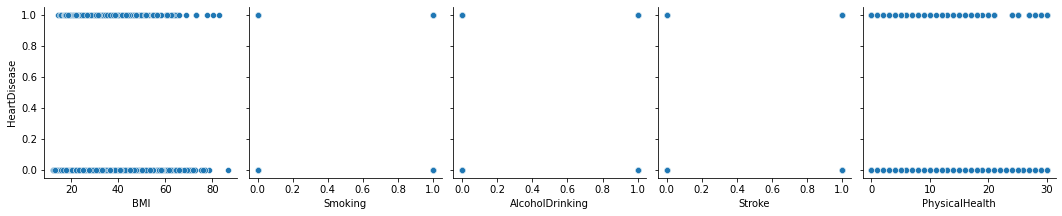

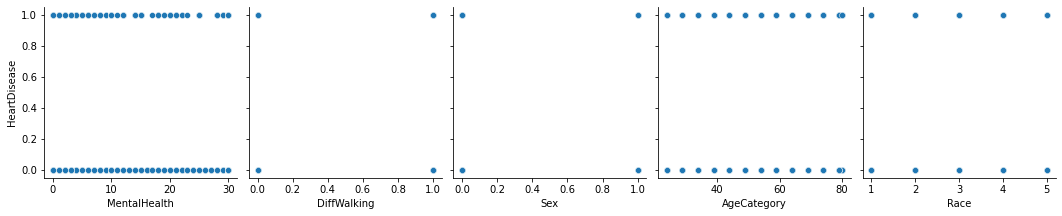

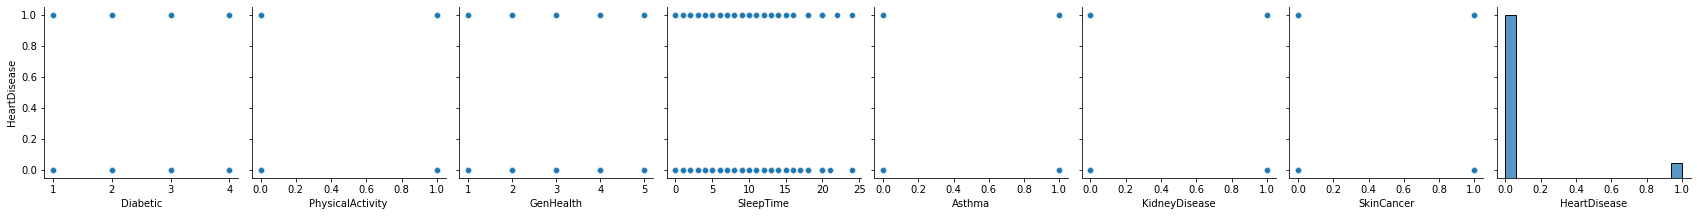

In [6]:
sns.pairplot(df_num, height=3, y_vars = 'HeartDisease', x_vars = df_num.columns[0:5], kind='scatter')
sns.pairplot(df_num, height=3, y_vars = 'HeartDisease', x_vars = df_num.columns[5:10], kind='scatter')
sns.pairplot(df_num, height=3, y_vars = 'HeartDisease', x_vars = df_num.columns[10:], kind='scatter')

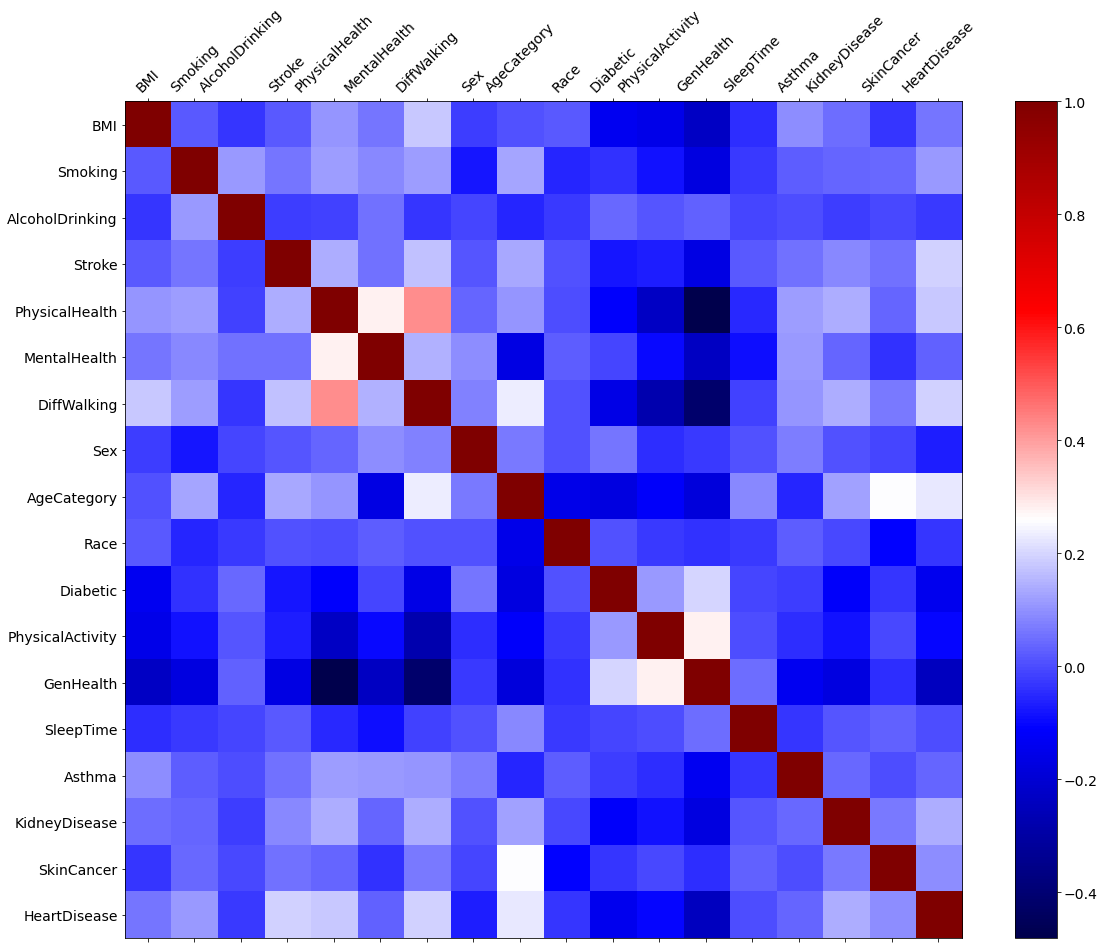

In [7]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_num.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_num.select_dtypes(['number']).shape[1]), df_num.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_num.select_dtypes(['number']).shape[1]), df_num.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

In [8]:
selected_cols = ['BMI','PhysicalHealth','MentalHealth','AgeCategory', 'SleepTime']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]

In [9]:
model = [('model', LinearRegression())]

In [10]:
pipeline = Pipeline(pre+model)

In [11]:
X = df_tracks.drop('HeartDisease', axis = 1)
y = df_tracks['HeartDisease']

pipeline = pipeline.fit(X + 1,y)

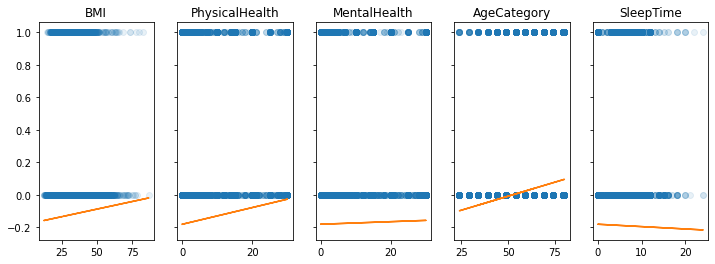

In [12]:
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i 
    col = selected_cols[pos_col]

    x = X[col]
    m = pipeline['model'].coef_[pos_col]
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

In [13]:
filename = 'pipelineForHeartDisease.joblib'
# Se guarda
dump(pipeline, filename) 

['pipelineForHeartDisease.joblib']

In [14]:
# Se lee
p2 = load(filename)
p2

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['BMI', 'PhysicalHealth',
                                                   'MentalHealth',
                                                   'AgeCategory',
                                                   'SleepTime'])])),
                ('model', LinearRegression())])

<AxesSubplot:xlabel='HeartDisease', ylabel='Count'>

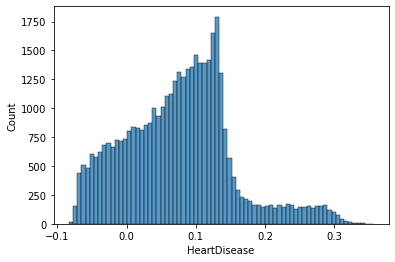

In [15]:
df_recent['HeartDisease'] = p2.predict(X)
sns.histplot(df_recent['HeartDisease'])


In [16]:
pipeline['model'].coef_
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})


,columns,coef
0,BMI,0.001864
1,PhysicalHealth,0.005141
2,MentalHealth,0.000792
3,AgeCategory,0.003455
4,SleepTime,-0.001456


In [17]:
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

,columns,coef
0,BMI,0.001864
1,PhysicalHealth,0.005141
2,MentalHealth,0.000792
3,AgeCategory,0.003455
4,SleepTime,-0.001456


In [18]:
p2.score(X,y)

0.07597566296145564

In [19]:
y_true = y
y_predicted = p2.predict(X)

np.sqrt(mse(y_true, y_predicted))

0.2692863404618084

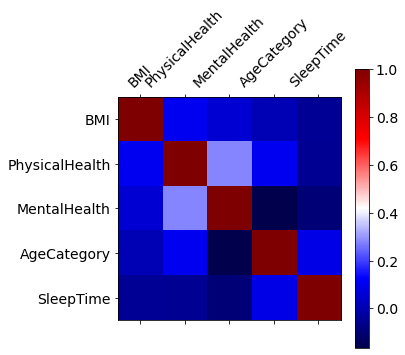

In [20]:
df_temp = df_tracks[selected_cols]


f = plt.figure(figsize=(5, 5))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

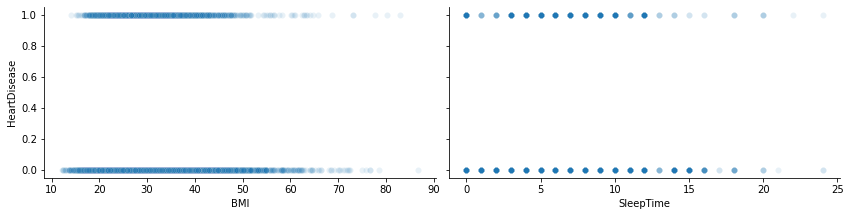

In [21]:
sns.pairplot(df_tracks, height=3, aspect = 2, y_vars = 'HeartDisease', x_vars = ['BMI','SleepTime'], kind='scatter', plot_kws = {'alpha':0.1}) 

In [22]:
X = df_tracks[['BMI']].copy()
X['BMI_2'] = X['BMI']**2

# columna
col = 'BMI_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,y)

print(f"{col}: {p_temp.score(X,y)}")

BMI_2: 0.003258748893916752


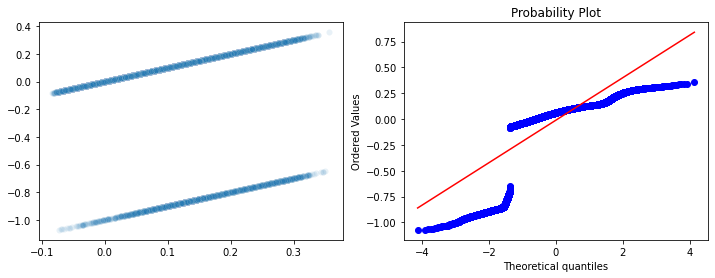

In [23]:
X = df_tracks.drop('HeartDisease', axis = 1)
y = df_tracks['HeartDisease']

#errores
errors = (p2.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = p2.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

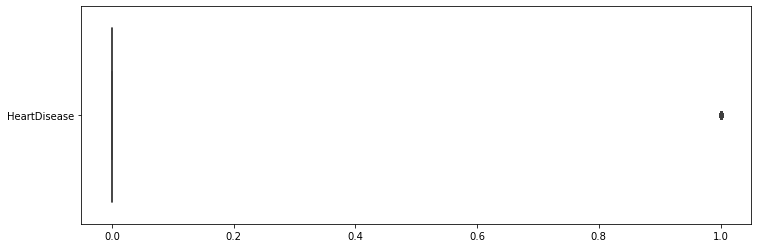

In [24]:
 # Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_tracks[['HeartDisease']], orient="h")

In [25]:
regresion_lineal = LinearRegression() 
regresion_lineal.fit(X, y) 
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [ 5.15657699e-06  2.24274977e-02 -1.59309838e-02  1.87373249e-01
  1.54598028e-03  5.96710131e-06  3.95148527e-02 -4.47948817e-02
  2.30602420e-03 -3.00694507e-03 -3.75181389e-02 -5.01995616e-03
 -3.28689956e-02 -1.29771604e-03  9.58713328e-03  9.71249191e-02
  3.13336347e-02], b = 0.15294134610376622


In [28]:
#Guardamos elmodelo en un archivo PKL
import pickle
pickle.dump(regresion_lineal, open(r"RegresionLineal.pkl", "wb"))